In [1]:
import os
import pandas as pd

In [3]:
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data/train.csv
data/test.csv
data/stores.csv
data/features.csv


In [5]:
df_train = pd.read_csv('data/train.csv')

In [6]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [7]:
len(df_train)

421570

In [8]:
df_test = pd.read_csv('data/test.csv')

In [9]:
df_test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [10]:
len(df_test)

115064

In [11]:
df_train.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [12]:
df_stores = pd.read_csv('data/stores.csv')

In [13]:
df_features = pd.read_csv('data/features.csv')

In [15]:
df_stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [17]:
len(df_stores)

45

In [18]:
df_stores.tail()

,Store,Type,Size
40,41,A,196321
41,42,C,39690
42,43,C,41062
43,44,C,39910
44,45,B,118221


In [19]:
df_features = pd.read_csv('data/features.csv')

In [20]:
df_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [25]:
len(df_features)

8190

In [26]:
df_features.tail()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False
8189,45,2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False


# Data preparation and analysis

Merging the features and training data to get cumulative insights from overall

In [22]:
traindf1 = df_train.merge(df_features,how='left',indicator=True).merge(df_stores,how='left') # merging allthree dataframes with matching store column

In [23]:
traindf1.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,_merge,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,both,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,both,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,both,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,both,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,both,A,151315


In [24]:
traindf1.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,_merge,Type,Size
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,both,B,118221
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,both,B,118221
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,both,B,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,both,B,118221
421569,45,98,2012-10-26,1076.80,False,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,both,B,118221


In [27]:
traindf1

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,_merge,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,both,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,both,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,both,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,both,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,both,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,both,B,118221
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,both,B,118221
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,both,B,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,both,B,118221


In [28]:
traindf2 = traindf1.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis=1) # axis = 0 deletes Nan valued rows , axis=1 delete Nan valued Column

In [29]:
traindf2

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,_merge,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,both,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,211.242170,8.106,both,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,both,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,both,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,211.350143,8.106,both,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,192.013558,8.684,both,B,118221
421566,45,98,2012-10-05,628.10,False,64.89,3.985,192.170412,8.667,both,B,118221
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,192.327265,8.667,both,B,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,192.330854,8.667,both,B,118221


In [32]:
# lets check the missing data values
traindf2.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
_merge          0
Type            0
Size            0
dtype: int64

In [33]:
# now lets see how many negative and zero sales values are there
traindf2.loc[traindf2['Weekly_Sales']<=0] # outliers

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,_merge,Type,Size
846,1,6,2012-08-10,-139.65,False,85.05,3.494,221.958433,6.908,both,A,151315
2384,1,18,2012-05-04,-1.27,False,75.55,3.749,221.671800,7.143,both,A,151315
6048,1,47,2010-02-19,-863.00,False,39.93,2.514,211.289143,8.106,both,A,151315
6049,1,47,2010-03-12,-698.00,False,57.79,2.667,211.380643,8.106,both,A,151315
6051,1,47,2010-10-08,-58.00,False,63.93,2.633,211.746754,7.838,both,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...
419597,45,80,2010-02-12,-0.43,True,27.73,2.773,181.982317,8.992,both,B,118221
419598,45,80,2010-02-19,-0.27,False,31.27,2.745,182.034782,8.992,both,B,118221
419603,45,80,2010-04-16,-1.61,False,54.28,2.899,181.692477,8.899,both,B,118221
419614,45,80,2010-07-02,-0.27,False,76.61,2.815,182.318780,8.743,both,B,118221


# lets remove these data, 
  -  Negative and zero sales values might represent errors or outliers, and keeping them in the dataset could lead to misleading conclusions.
  -  Removing these values helps ensure that you're analyzing only the valid sales data, leading to more accurate insights and better model performance.
  -  Always validate whether negative or zero sales have any legitimate business meaning (such as returns, refunds, or zero sales weeks), but if not, they are typically treated as errors to be excluded.



In [36]:
traindf3 = traindf2.loc[traindf2['Weekly_Sales']>0] # outliers

In [37]:
len(traindf3)

420212

In [38]:
421570 - 1358 # removed the outliers

420212

In [39]:
trandf3.sort_values(by='Date')

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,_merge,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,both,A,151315
140804,15,21,2010-02-05,3253.19,False,19.83,2.954,131.527903,8.350,both,B,123737
140661,15,20,2010-02-05,4606.90,False,19.83,2.954,131.527903,8.350,both,B,123737
140518,15,19,2010-02-05,1381.40,False,19.83,2.954,131.527903,8.350,both,B,123737
140408,15,18,2010-02-05,2239.25,False,19.83,2.954,131.527903,8.350,both,B,123737
...,...,...,...,...,...,...,...,...,...,...,...,...
173673,18,52,2012-10-26,2226.10,False,56.09,3.917,138.728161,8.243,both,B,120653
342211,36,16,2012-10-26,564.50,False,74.39,3.494,222.113657,6.228,both,A,39910
390158,41,92,2012-10-26,131128.24,False,41.80,3.686,199.219532,6.195,both,A,196321
175485,18,81,2012-10-26,14036.52,False,56.09,3.917,138.728161,8.243,both,B,120653


In [40]:
traindf3['Type'].unique() # store varities

array(['A', 'B', 'C'], dtype=object)

# Now lets visualize the data

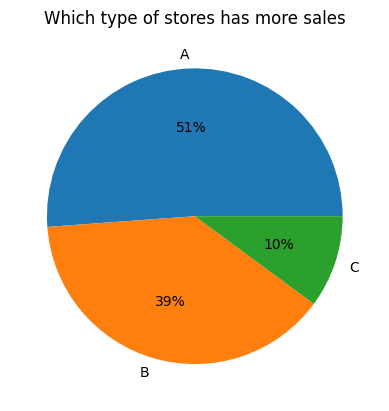

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# creating dataset
data = traindf3['Type'].value_counts()

# creating plot
fig, ax = plt.subplots()
plt.pie(data, labels=data.index,autopct='%.0f%%')
ax.set_title('Which type of stores has more sales')

# show plot
plt.show()

In [46]:
traindf3['year'] = pd.DatetimeIndex(traindf3['Date']).year # sepearating year data
traindf3['month'] = pd.DatetimeIndex(traindf3['Date']).month  # Separating month data
traindf3['day'] = pd.DatetimeIndex(traindf3['Date']).day  # Separating day data

/tmp/ipykernel_12396/3253954075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traindf3['year'] = pd.DatetimeIndex(traindf3['Date']).year # sepearating year data
/tmp/ipykernel_12396/3253954075.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traindf3['month'] = pd.DatetimeIndex(traindf3['Date']).month  # Separating month data
/tmp/ipykernel_12396/3253954075.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [47]:
traindf3

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,_merge,Type,Size,year,month,day
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,both,A,151315,2010,2,5
1,1,1,2010-02-12,46039.49,True,38.51,2.548,211.242170,8.106,both,A,151315,2010,2,12
2,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,both,A,151315,2010,2,19
3,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,both,A,151315,2010,2,26
4,1,1,2010-03-05,21827.90,False,46.50,2.625,211.350143,8.106,both,A,151315,2010,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,192.013558,8.684,both,B,118221,2012,9,28
421566,45,98,2012-10-05,628.10,False,64.89,3.985,192.170412,8.667,both,B,118221,2012,10,5
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,192.327265,8.667,both,B,118221,2012,10,12
421568,45,98,2012-10-19,760.01,False,56.47,3.969,192.330854,8.667,both,B,118221,2012,10,19


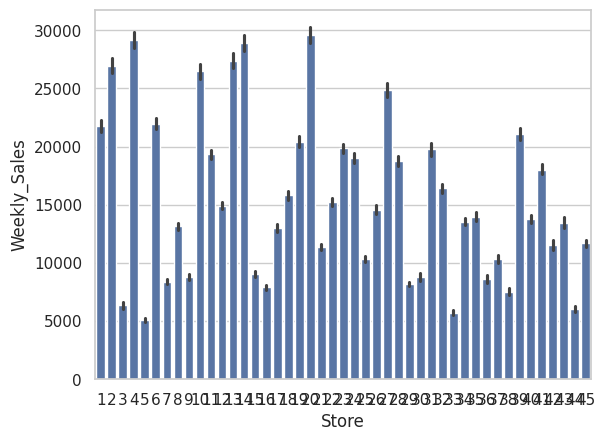

In [51]:
import seaborn as sns
sns.set_theme(style="whitegrid")
tips = traindf3
ax = sns.barplot(x='Store',y='Weekly_Sales',data=tips) # weekly sales vs store

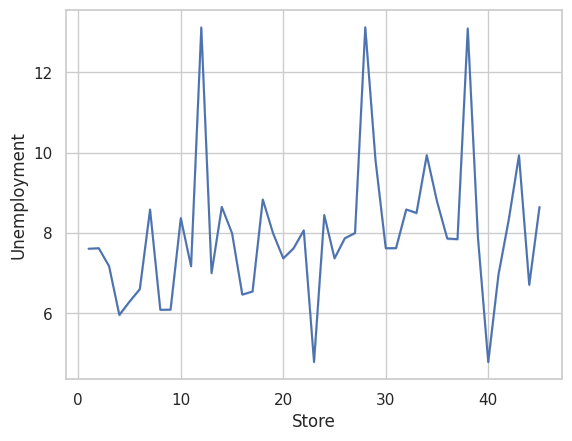

In [53]:
# store vs unemployement
data = traindf3
sns.lineplot(x='Store',y='Unemployment',data=data)
plt.show()

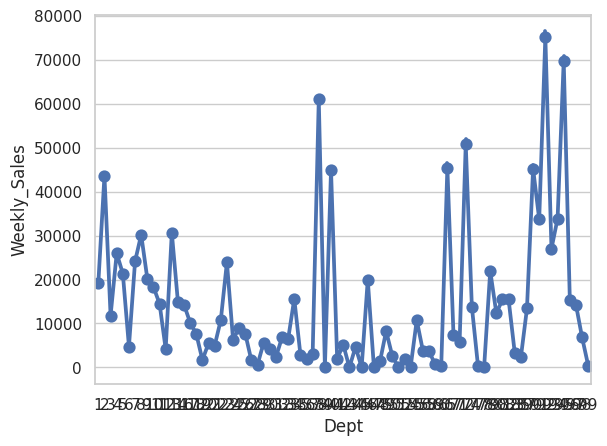

In [54]:
# weekly sales vs department
data = traindf3
sns.pointplot(x='Dept',
             y='Weekly_Sales',
             data=data)
sns.set(rc = {'figure.figsize':(25,8)})
plt.show()

<Axes: xlabel='month'>

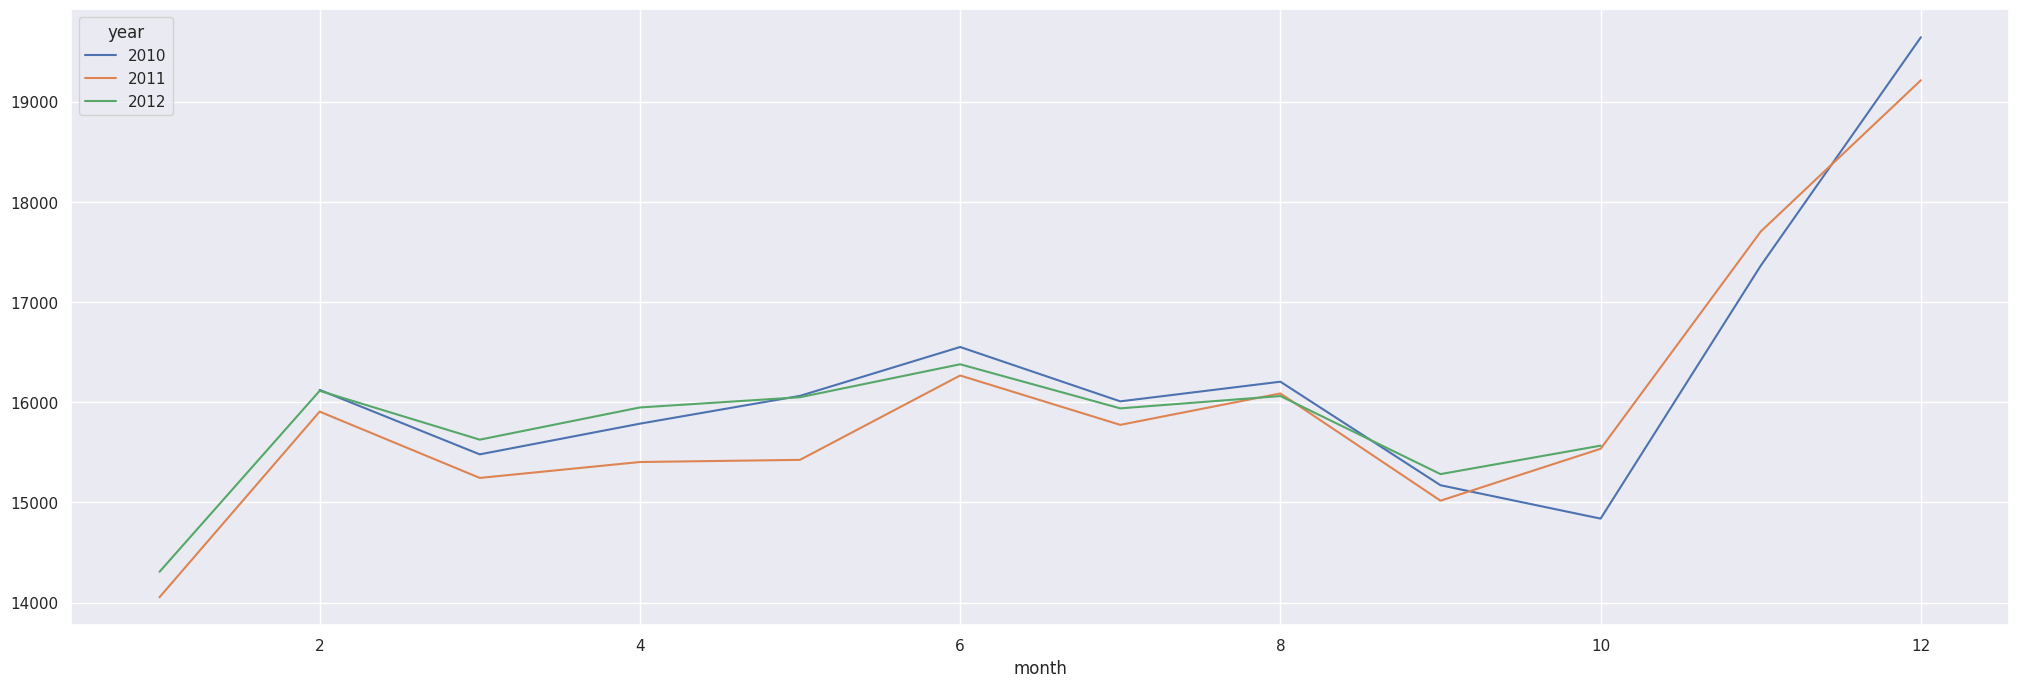

In [55]:
month_wise_sales = pd.pivot_table(traindf3,values='Weekly_Sales',columns='year',index='month')
month_wise_sales.plot()

In [56]:
# Label encoding for Holiday column and Type
from sklearn import preprocessing

# label_encoder object knows how to understand word labels
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'
traindf3['IsHoliday'] = label_encoder.fit_transform(traindf3['IsHoliday'])
traindf3['Type'] = label_encoder.fit_transform(traindf3['Type'])

traindf3

/tmp/ipykernel_12396/279796669.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traindf3['IsHoliday'] = label_encoder.fit_transform(traindf3['IsHoliday'])
/tmp/ipykernel_12396/279796669.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traindf3['Type'] = label_encoder.fit_transform(traindf3['Type'])


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,_merge,Type,Size,year,month,day
0,1,1,2010-02-05,24924.50,0,42.31,2.572,211.096358,8.106,both,0,151315,2010,2,5
1,1,1,2010-02-12,46039.49,1,38.51,2.548,211.242170,8.106,both,0,151315,2010,2,12
2,1,1,2010-02-19,41595.55,0,39.93,2.514,211.289143,8.106,both,0,151315,2010,2,19
3,1,1,2010-02-26,19403.54,0,46.63,2.561,211.319643,8.106,both,0,151315,2010,2,26
4,1,1,2010-03-05,21827.90,0,46.50,2.625,211.350143,8.106,both,0,151315,2010,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,0,64.88,3.997,192.013558,8.684,both,1,118221,2012,9,28
421566,45,98,2012-10-05,628.10,0,64.89,3.985,192.170412,8.667,both,1,118221,2012,10,5
421567,45,98,2012-10-12,1061.02,0,54.47,4.000,192.327265,8.667,both,1,118221,2012,10,12
421568,45,98,2012-10-19,760.01,0,56.47,3.969,192.330854,8.667,both,1,118221,2012,10,19


In [ ]:
# Feature Importance Test using various techniques